## Demo 2. Benchmarking onset by region and lead time

This demo shows examples of how to find forecast skill for differnet regions and lead times.  

the objective is to:
1. learn how to define custom regions in ROMP 
2. understand how skill score changes with different lead times.

In [1]:
# explicitly specify your repo dir
repo_dir = "~/Code/project/ROMP/"
%cd {repo_dir}

/Users/bodong/Code/project/ROMP


In [3]:
import momp.lib.loader as loader
get_cfg = loader.get_cfg
cfg = get_cfg()
print("region = ", cfg.region)

Configuration validated!
region =  Sub_Ethiopia


<br>

we can see the region specified in the config file is "Sub_Ethiopia", which is a user defined sub region in the eastern highland.   

Open `params/region_def.py`, and in the `domain()` function, we can see the exact boundaries that defines this rectangular subregion. 

```
        lats = 10.5
        latn = 12
        lonw = 38
        lone = 39
```

this is also the default region when we run the probabilistic metrics in the demo 1 notebook.  


now we have everthing setup, let's install `pip install .` and run ROMP `momp-run`



In [6]:
!pip install .

In [6]:
!momp-run

package base dir /Users/bodong/Code/project/ROMP/.venv-romp/lib/python3.13/site-packages/momp
work_dir =  /Users/bodong/Code/benchmarking/test_romp_project
pkg_dir =  /Users/bodong/Code/benchmarking/momp
ref_model_dir =  /Users/bodong/Code/project/ROMP/data/CHIRPS_IMERG
out_dir =  /Users/bodong/Code/project/ROMP/demo/et/output
out_fig =  /Users/bodong/Code/project/ROMP/demo/et/figure
obs_dir =  /Users/bodong/Code/project/ROMP/data/CHIRPS_IMERG
thresh_file =  None
shpfile_dir =  None
nc_mask =  /Users/bodong/Code/project/ROMP/demo/data/jjas_seasonal_mask_0p25.nc
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!

  ____    ___   __  __  ____
 |  _ \  / _ \ |  \/  ||  _ \
 | |_) || | | || |\/| || |_) |
 |  _ < | |_| || |  | ||  __/
 |_| \_\ \___/ |_|  |_||_|

 Rainy season Onset Metrics Package (ROMP)
 Version : 0.0.1

--------------------------------------------------------------------------------
 Project    : te

<br>

load the metrics figure

package base dir /Users/bodong/Code/project/ROMP/momp
work_dir =  /Users/bodong/Code/benchmarking/test_romp_project
pkg_dir =  /Users/bodong/Code/benchmarking/momp
ref_model_dir =  /Users/bodong/Code/project/ROMP/data/CHIRPS_IMERG
out_dir =  /Users/bodong/Code/project/ROMP/demo/et/output
out_fig =  /Users/bodong/Code/project/ROMP/demo/et/figure
obs_dir =  /Users/bodong/Code/project/ROMP/data/CHIRPS_IMERG
thresh_file =  None
shpfile_dir =  None
nc_mask =  /Users/bodong/Code/project/ROMP/demo/data/jjas_seasonal_mask_0p25.nc
Configuration validated!
/Users/bodong/Code/project/ROMP/demo/et/figure
loading figure /Users/bodong/Code/project/ROMP/demo/et/figure/skill_scores_heatmap_gencast_1-15.png


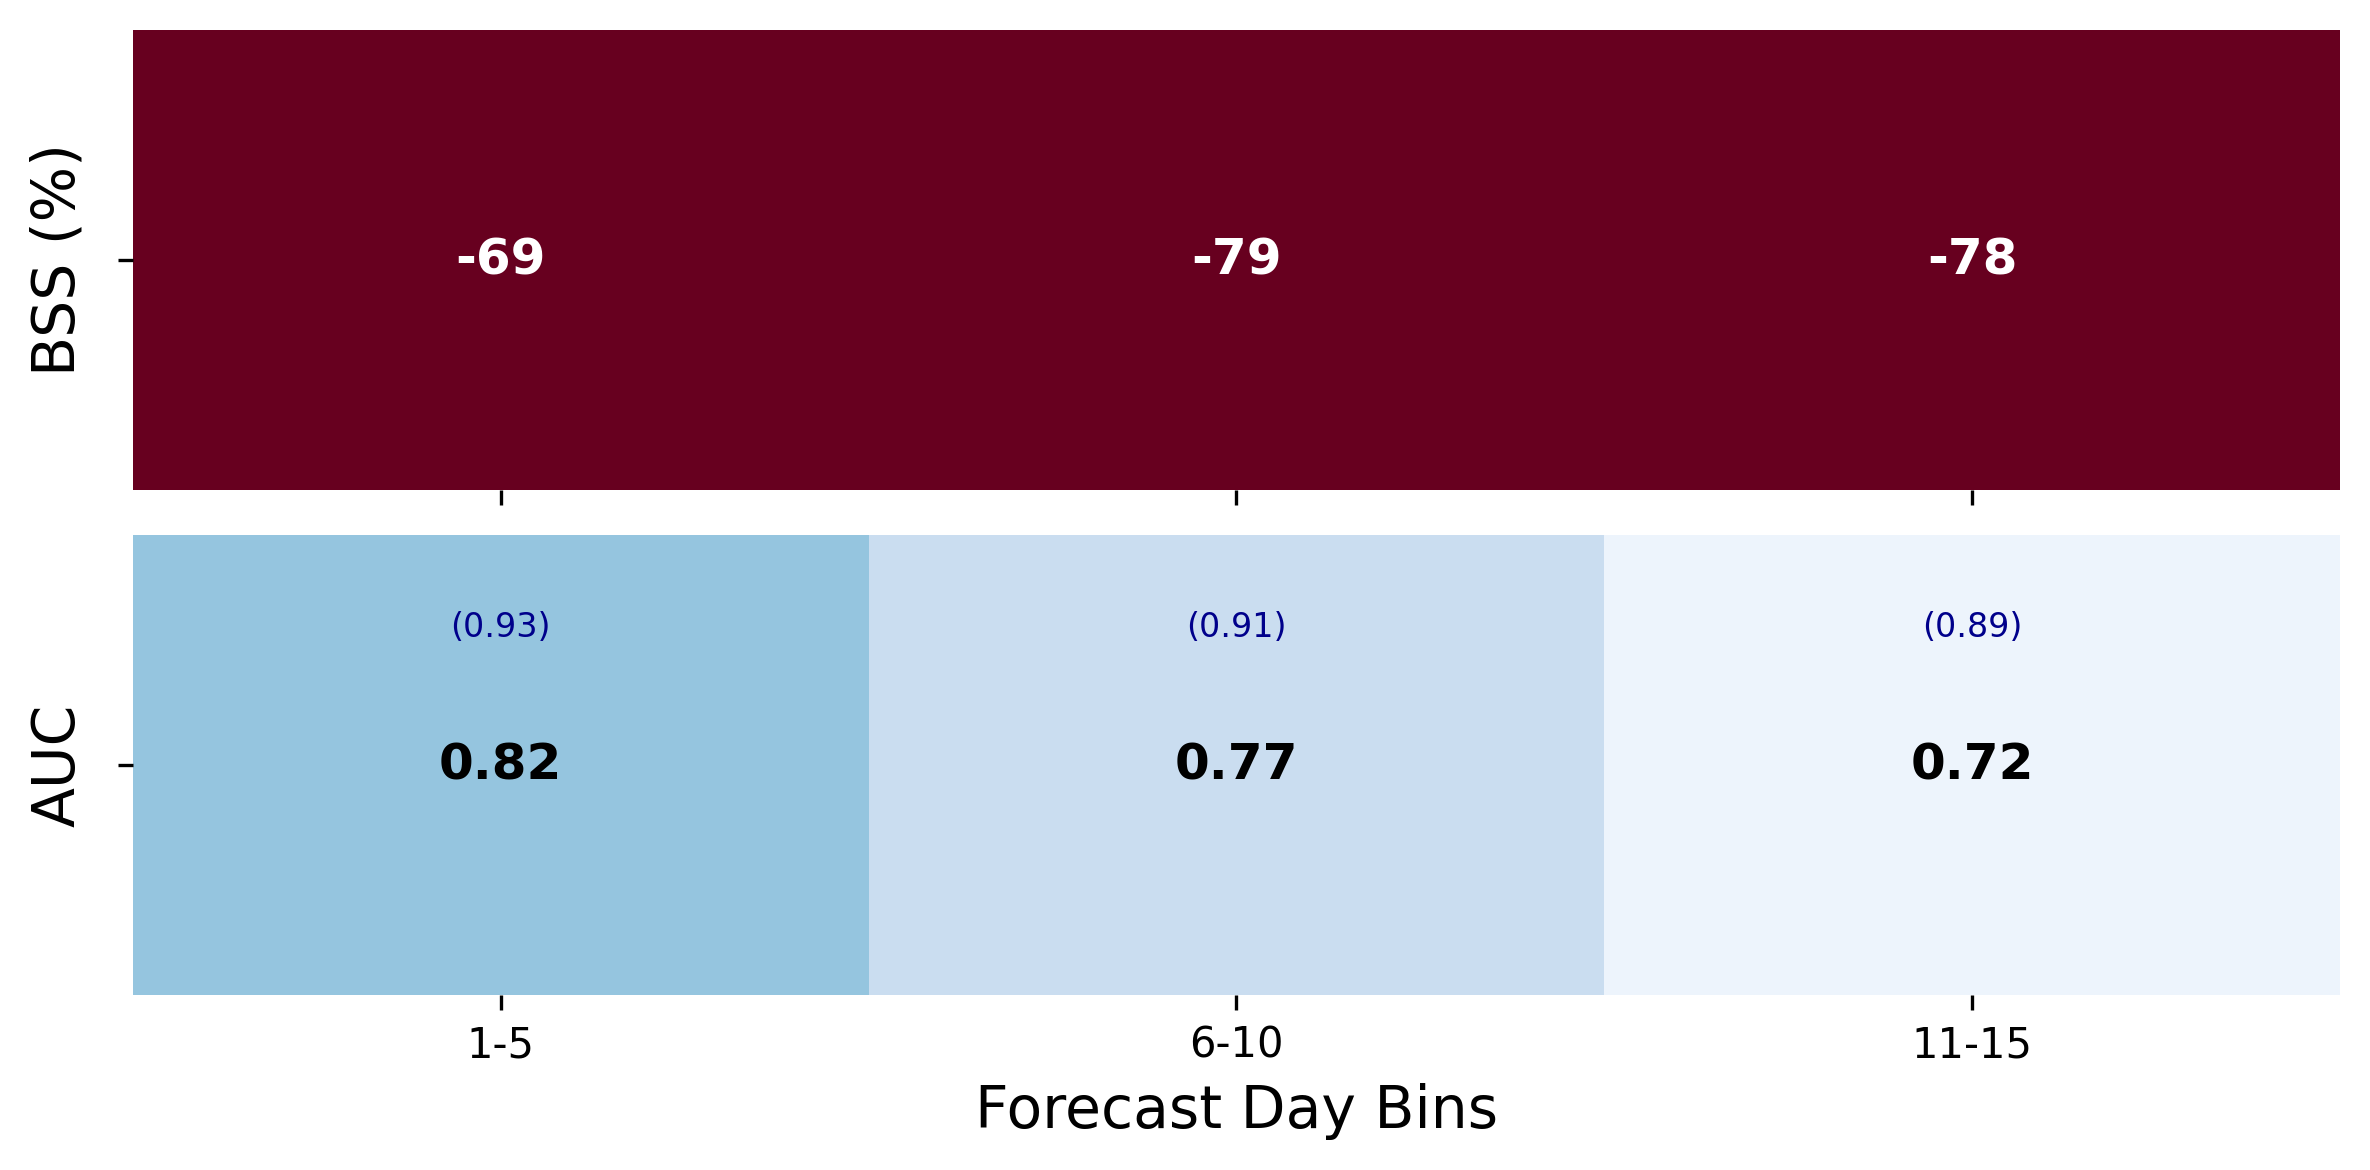

In [2]:
import os
from IPython.display import Image, display
from momp.utils.printing import tuple_to_str
import momp.lib.loader as loader
get_cfg = loader.get_cfg
cfg = get_cfg()
window = tuple_to_str(cfg.verification_window_list[0])
model = cfg.model_list[0]
dir_fig = cfg.dir_fig
print(dir_fig)
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_gencast_{window}.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=510))

<br>

#### Prompt: what do these skill scores imply in operational forecast?   

<br>

now change the boundaries to the domain of your interest, and run the package. 

in the `domain()` function, create a boundary definition section with your preferred name, e.g.,  

```
    if region == "domain_highland_east":
        lats = 10.5 
        latn = 12.5
        lonw = 37.5
        lone = 40
```

then in the `config.in` change the region entry to 

`region = "domain_highland_east"`


install and run the package 

once the benchmarking workflow is complete, open the figure and compare the difference


<br>

### Bonus!!! you will need to add a few new cells to fullfill the changes and package run as detailed above.

<br>

In [3]:
# add package execution prompt here, add a few more cells as needed
# hint: refer to the steps for our first case 

<br>

### Important!!! restart the kernel before running the rest of the cells!!! 
### Important!!! restart the kernel before running the rest of the cells!!! 

<br>

In [5]:
# explicitly specify your repo dir
repo_dir = "~/Code/project/ROMP/"
%cd {repo_dir}

/Users/bodong/Code/project/ROMP


Configuration validated!
/Users/bodong/Code/project/ROMP/demo/et/figure
loading figure /Users/bodong/Code/project/ROMP/demo/et/figure/skill_scores_heatmap_gencast_1-15.png


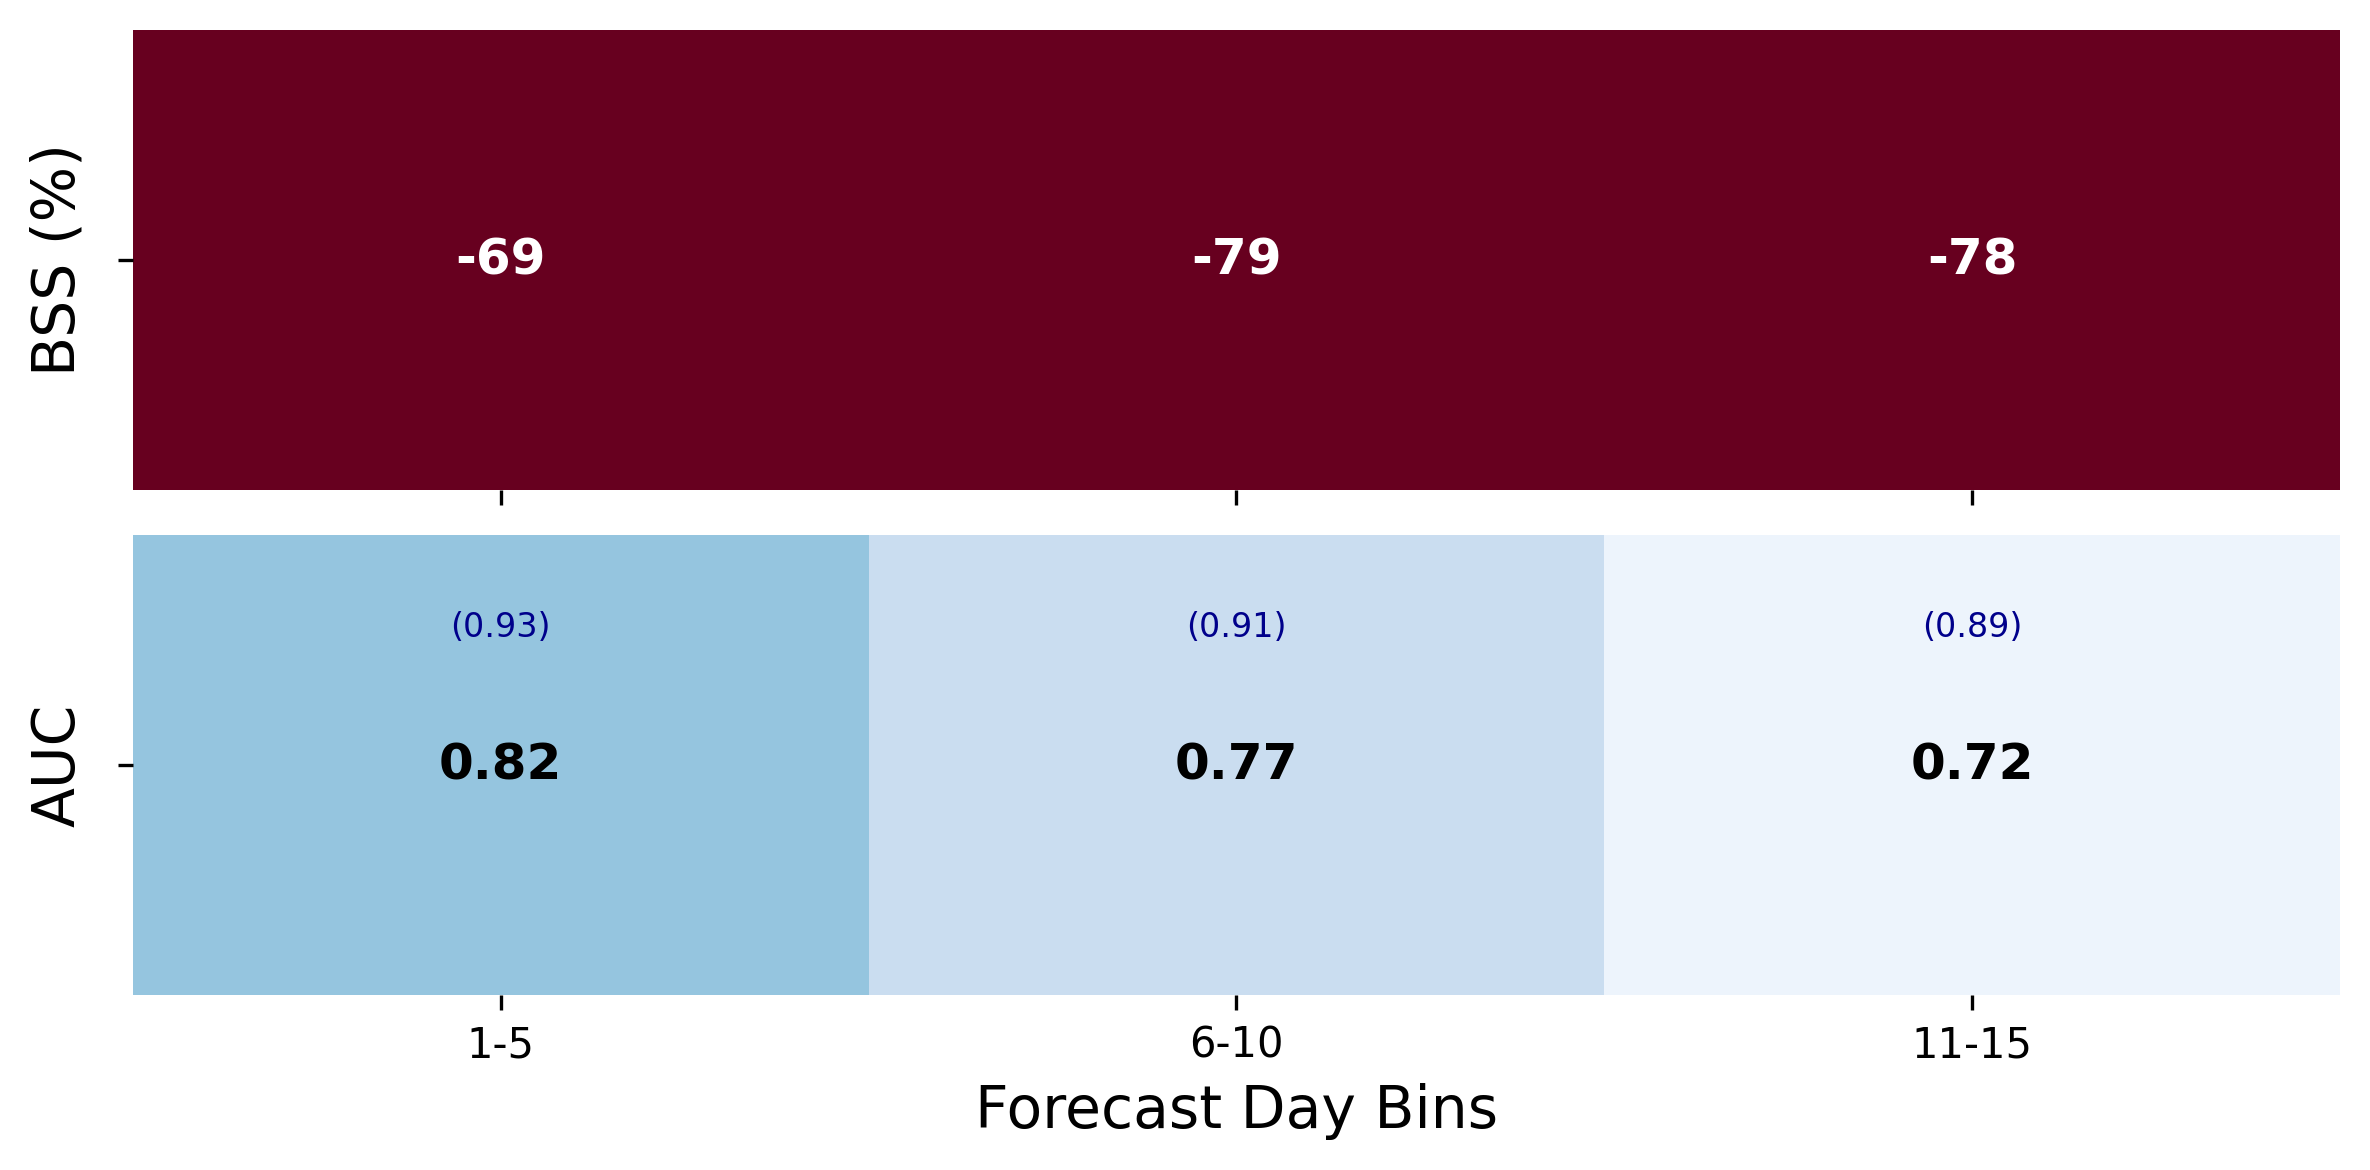

In [4]:
import os
from IPython.display import Image, display
from momp.utils.printing import tuple_to_str
import momp.lib.loader as loader
get_cfg = loader.get_cfg
cfg = get_cfg()
window = tuple_to_str(cfg.verification_window_list[0])
model = cfg.model_list[0]
dir_fig = cfg.dir_fig
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_gencast_{window}.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=510))

<br>

##### Prompt: does the new region have higher forecast skill score? 

<br>



Next, we will examine how the skill scores vary with **forecast lead time**.  

change the following parameters in `config.in`
```
verification_window_list = ((16, 30),)
tolerance_days_list = (5, )
max_forecast_day = 30
day_bins = ((16, 20), (21, 25), (26, 30))
```

install and run the package

after the benchmarking workflow is complete, open the figure and compare it with the 1-15 window forecast


In [ ]:
# add package execution prompt here, add a few more cells as needed
# hint: refer to the steps for our first case 

<br>

### Important!!! restart the kernel before running the rest of the cells!!! 
### Important!!! restart the kernel before running the rest of the cells!!! 

<br>

In [ ]:
repo_dir = "~/Code/project/ROMP/"
%cd {repo_dir}

loading figure ../demo/et/figure/skill_scores_heatmap_gencast_16-30.png


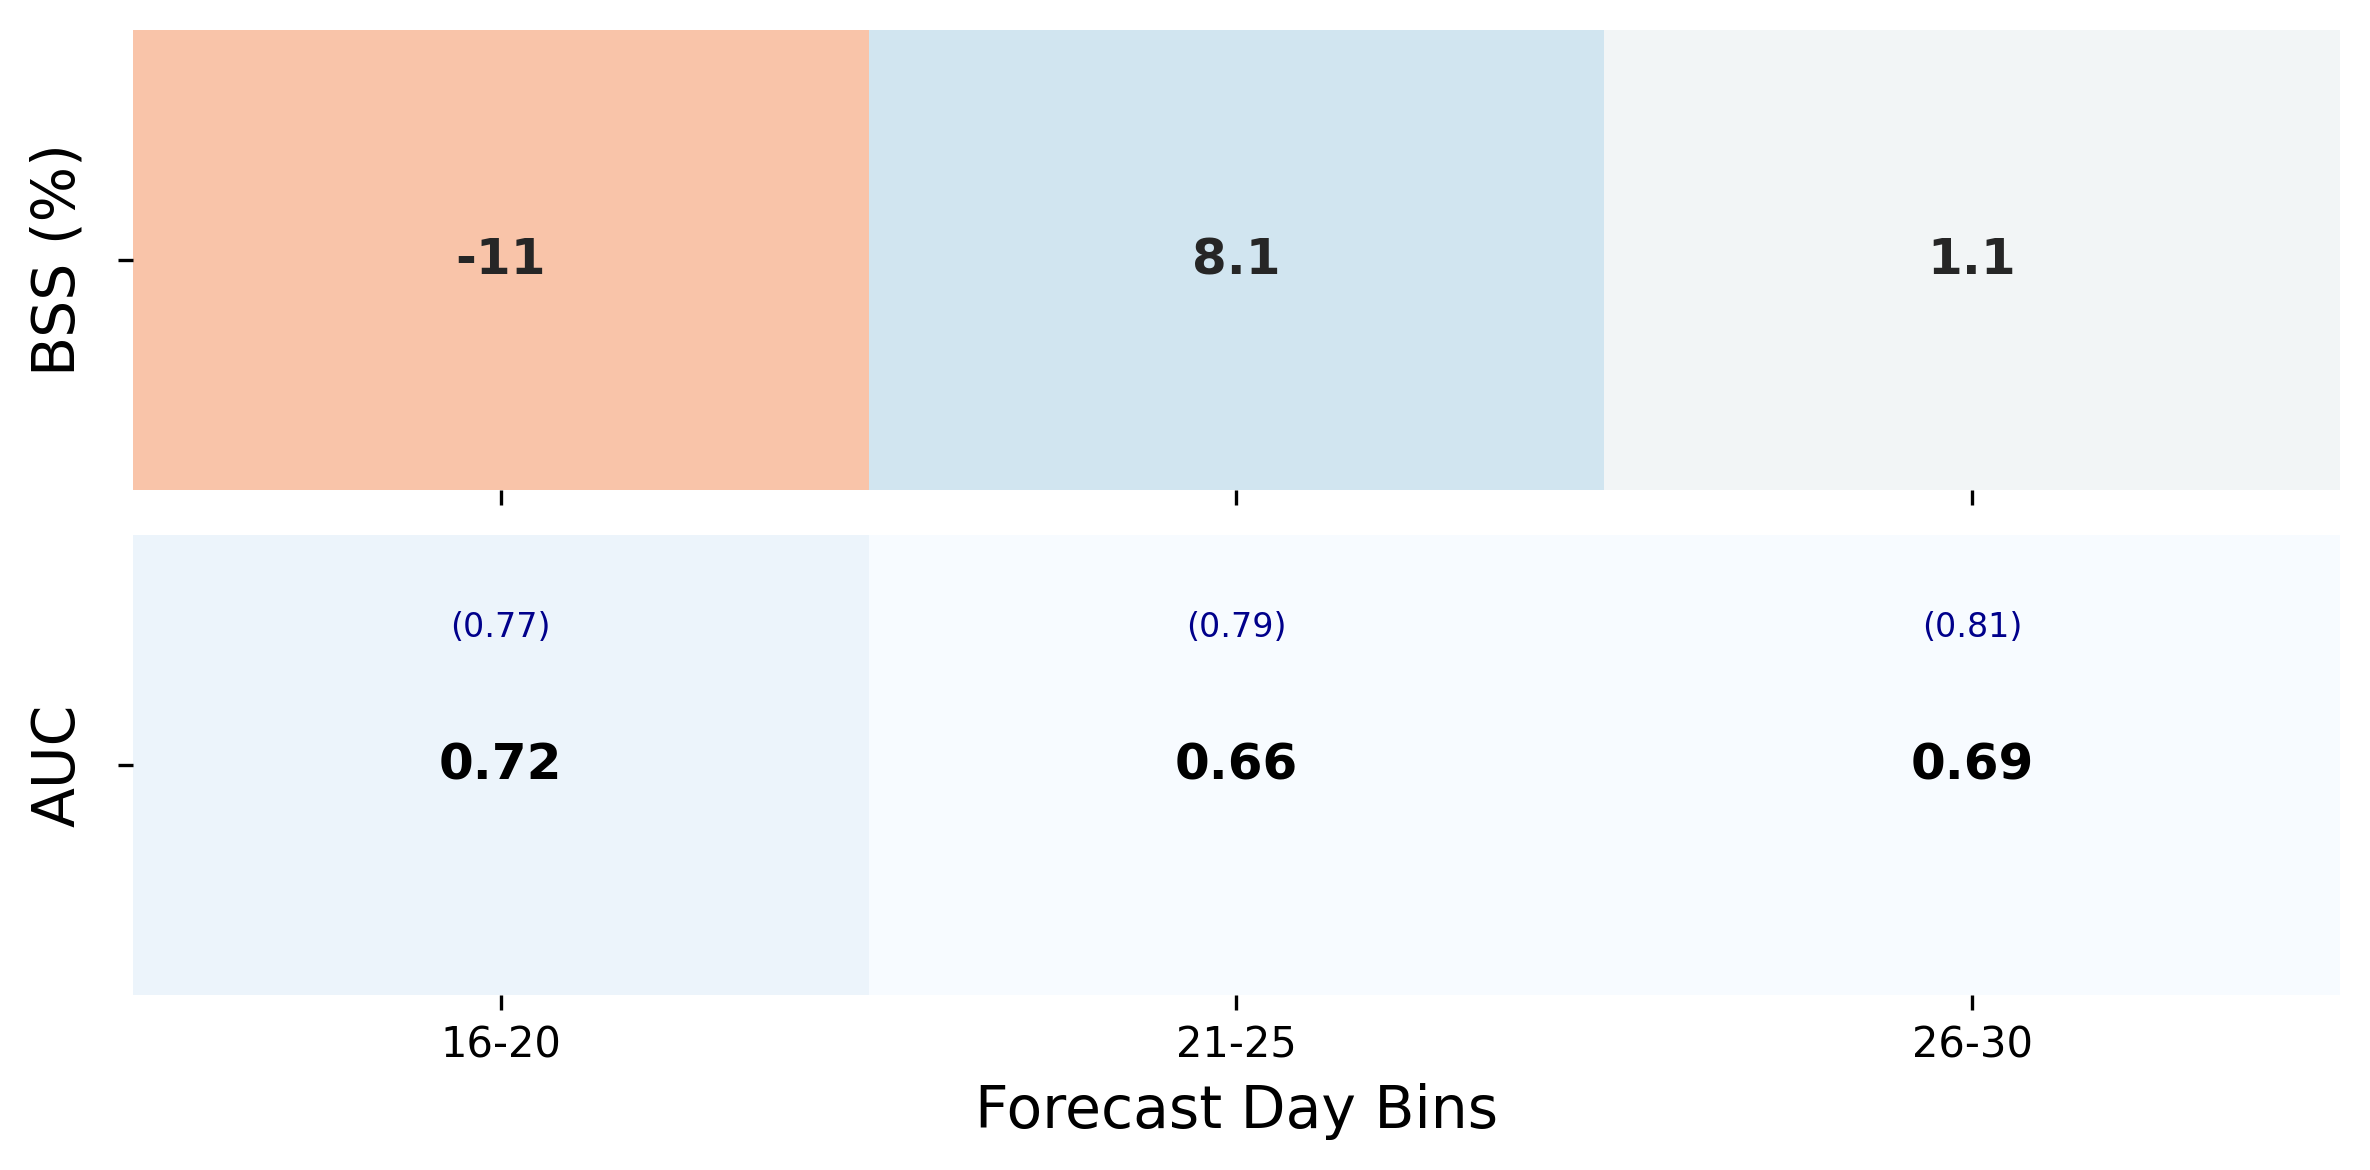

In [15]:
import importlib
importlib.reload(loader)
get_cfg = loader.get_cfg
cfg = get_cfg()
window = tuple_to_str(cfg.verification_window_list[0])
model = cfg.model_list[0]
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_gencast_{window}.png')
print(f"loading figure {fig_filename}")
display(Image(filename=fig_filename, width=510))

<br>

##### Prompt: How do the model skill compare as lead time increases?